Obtain dataset from https://www.kaggle.com/datasets/nimishasen27/spotify-dataset?resource=download&select=tracks.csv

# **Data Cleansing**

In [2]:
# Importing the relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [3]:
artist_df = pd.read_csv("artists.csv")
tracks_df = pd.read_csv("tracks.csv")


In [4]:
artist_df.head()


,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [5]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


## Handling missing data

In [6]:
# Checking for null values in the datasets
print("Number of null values in each column of artist_df:")
print(artist_df.isnull().sum())

print("\nNumber of null values in each column of tracks_df:")
print(tracks_df.isnull().sum())

Number of null values in each column of artist_df:
id             0
followers     13
genres         0
name           3
popularity     0
dtype: int64

Number of null values in each column of tracks_df:
id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


In [7]:
# Checking for rows with null values in the both dataset
print("Rows with null values in artist_df:")
print(artist_df[artist_df.isnull().any(axis=1)])

print("\nRows with null values in tracks_df:")
print(tracks_df[tracks_df.isnull().any(axis=1)])

Rows with null values in artist_df:
                            id  followers  \
260011  2ZO5sFPyILDQkFdS4HJPFS     8718.0   
423964  4zevbrEdBtYUhAZgCGDtxz      270.0   
444199  7F71W80jaXFARK7hBjsDI2        NaN   
444200  3MLHJz04KmEVzCTPclzkEm        NaN   
444797  0cqZsULDZdJTGA4Zqh8Ckv        NaN   
444798  0BuknWzKujyc9HfZ1V50Uk        NaN   
446635  6ltU5gIDLmWNYaVNHnll5G        NaN   
446636  7C9nWRMbRqpPUuKh2OEw9n        NaN   
446637  41c30F8zy5UCTSevbn0WfD        NaN   
468525  1DK979aOesiZ4Vkus8txqu        NaN   
468526  6jkpqSWWsXSuqtsoeAiMDU        NaN   
468527  7aMdHPv79qOuqqBD6TnaCp        NaN   
468528  2lr0R5vHGfI0C489h0r6qV        NaN   
468529  0xkSOIeyeTILNIOZKyFgaP        NaN   
468530  4EqqnE0XMAcreVF84QGYJ0        NaN   
889212  5YVrJKFCv5krBGjhMya576      414.0   

                                               genres  \
260011  ['cascadian black metal', 'post-black metal']   
423964                                             []   
444199                     

In [8]:
# Handling missing data in artist_df
artist_df['followers'] = artist_df['followers'].fillna(0)  

unknown_artist = artist_df['name'].isnull()
num_unknown_artists = unknown_artist.sum()
unknown_name = [f'Unknown{i+1}' for i in range(num_unknown_artists)]
artist_df.loc[unknown_artist, 'name'] = unknown_name

print("\nAfter handling missing data in artist_df:")
print(artist_df.isnull().sum())



After handling missing data in artist_df:
id            0
followers     0
genres        0
name          0
popularity    0
dtype: int64


In [9]:
import ast

# checking for duplicates and unnecessary columns
artist_size = len(artist_df)
unique_artists = artist_df['name'].nunique()
unique_idartists = artist_df['id'].nunique()

print(f"\nNumber of artists in artist_df: {artist_size}")
print(f"Number of unique artists in artist_df: {unique_artists}")
print(f"Number of unique artist IDs in artist_df: {unique_idartists}")
# will continue with the main dataset since artist id is the identifier for the artist

#artist_popularity = artist_df['genres'].unique()
#print(f"\nUnique genres values in artist_df: {artist_popularity}")

# exploding genres column to get individual genres
print(artist_df['genres'].apply(type).value_counts())
artist_df['genres'] = artist_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
artist_df_exploded = artist_df.explode('genres').fillna('Unknown').reset_index(drop=True)
print(artist_df_exploded['genres'].apply(type).value_counts())
print(artist_df_exploded['genres'].nunique())
artist_df_exploded.head()



Number of artists in artist_df: 1104349
Number of unique artists in artist_df: 1078662
Number of unique artist IDs in artist_df: 1104349
genres
<class 'str'>    1104349
Name: count, dtype: int64
genres
<class 'str'>    1266576
Name: count, dtype: int64
5366


,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,Unknown,Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,Unknown,ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,Unknown,Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,Unknown,Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,Unknown,Ioannis Panoutsopoulos,0


In [10]:
import ast
# Handling missing data in tracks_df

# tracks w/ missing titles
notitles = tracks_df['name'].isnull()
num_notitles = notitles.sum()
notitles_list = [f'NoTitle{i+1}' for i in range(num_notitles)]
tracks_df.loc[notitles, 'name'] = notitles_list


# exploding artists column to handle missing artists
#print(tracks_df.dtypes)
print(tracks_df['id_artists'].apply(type).value_counts())
tracks_df['id_artists'] = tracks_df['id_artists'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
tracks_df_exploded = tracks_df.explode('id_artists').reset_index(drop=True)
print(tracks_df_exploded['id_artists'].apply(type).value_counts())

tracks_df_exploded = tracks_df_exploded.drop(columns=['artists'])

tracks_df_exploded = tracks_df_exploded.merge(artist_df[['id', 'name']], left_on='id_artists', right_on='id', how='left', suffixes=['_track','_artist'])
tracks_df_exploded = tracks_df_exploded.drop(columns=['id_artists'])

print("\nAfter handling missing data in tracks_df:")
print(tracks_df_exploded.isnull().sum())

tracks_df_exploded.head()





id_artists
<class 'str'>    586672
Name: count, dtype: int64
id_artists
<class 'str'>    757170
Name: count, dtype: int64

After handling missing data in tracks_df:
id_track                0
name_track              0
popularity              0
duration_ms             0
explicit                0
release_date            0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
id_artist           27029
name_artist         27029
dtype: int64


,id_track,name_track,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,id_artist,name_artist
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,Uli
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY,Fernando Pessoa
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,Ignacio Corsini
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,Ignacio Corsini
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su,Dick Haymes


In [11]:
combined_df = tracks_df_exploded.merge(artist_df_exploded[['id', 'genres','popularity']], left_on='id_artist', right_on='id', how='left', suffixes=['_track','_artist'])
combined_df = combined_df.drop(columns=['id'])
combined_df.head()

,id_track,name_track,popularity_track,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,id_artist,name_artist,genres,popularity_artist
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.4450,0,-13.338,...,0.674,0.7440,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,Uli,Unknown,4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,1922-06-01,0.695,0.2630,0,-22.136,...,0.797,0.0000,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY,Fernando Pessoa,Unknown,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,...,0.994,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,Ignacio Corsini,tango,23.0
3,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,1922-03-21,0.434,0.1770,1,-21.180,...,0.994,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,Ignacio Corsini,vintage tango,23.0
4,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,1922-03-21,0.321,0.0946,7,-27.961,...,0.995,0.9180,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,Ignacio Corsini,tango,23.0


## Analysis of cleaned dataset

In [12]:
# top 10

top10_tracks = tracks_df.nlargest(10, 'popularity').reset_index(drop=True)
print("\nTop 10 tracks by popularity:")
print(top10_tracks[['name', 'popularity', 'artists']])

top10_artists = artist_df.nlargest(10, 'popularity').reset_index(drop=True)
print("\nTop 10 artists by popularity:")
print(top10_artists[['name', 'popularity', 'followers']])

top10_tracks_id = top10_tracks[['id']]
top10_tracks = combined_df.merge(top10_tracks_id, left_on='id_track', right_on='id', how='inner').reset_index(drop=True)
genres_of_top100 = top10_tracks.groupby('genres').size().reset_index(name='count').sort_values(by='count', ascending=False)
print("\nTop 10 genres in the top 100 tracks:")
print(genres_of_top100.head(10))


Top 10 tracks by popularity:
                                     name  popularity  \
0  Peaches (feat. Daniel Caesar & Giveon)         100   
1                         drivers license          99   
2                  Astronaut In The Ocean          98   
3                         Save Your Tears          97   
4                               telepatía          97   
5                         Blinding Lights          96   
6                     Leave The Door Open          96   
7                            The Business          95   
8                                 Streets          94   
9                  Heartbreak Anniversary          94   

                                          artists  
0    ['Justin Bieber', 'Daniel Caesar', 'Giveon']  
1                              ['Olivia Rodrigo']  
2                                 ['Masked Wolf']  
3                                  ['The Weeknd']  
4                                  ['Kali Uchis']  
5                             

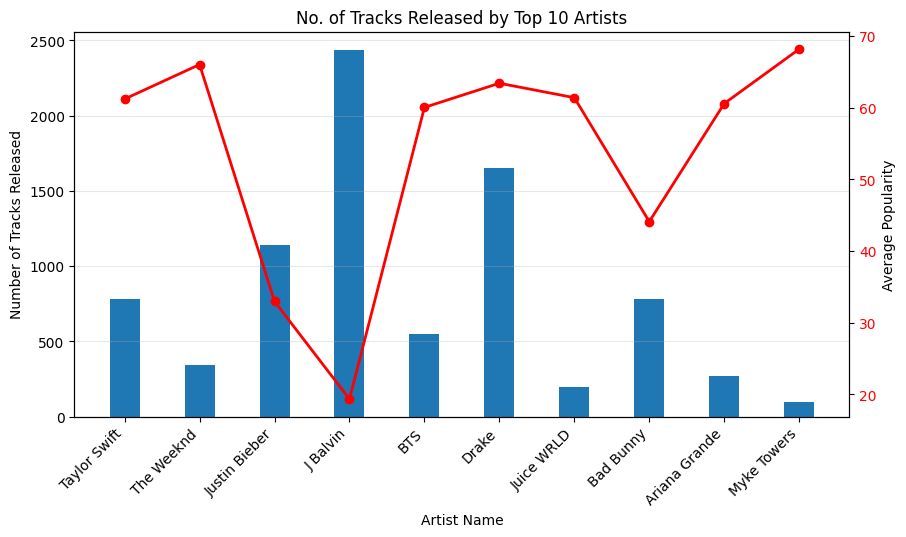

In [13]:
# tracks released by top 10 artists

top10_atracks = combined_df[combined_df['id_artist'].isin(top10_artists['id'])].reset_index(drop=True).sort_values(by='popularity_artist', ascending=False)
top10_atracks_count = top10_atracks.groupby(['id_artist', 'name_artist']).size().reset_index(name='count')

# average popularity of tracks by top 10 artists
top10_atracks_popularity = top10_atracks.groupby(['id_artist', 'name_artist'])['popularity_track'].mean().reset_index(name='avg_popularity')

top10_atracks_summary = top10_atracks_count.merge(top10_atracks_popularity, on=['id_artist', 'name_artist'])

# bar plot of top 10 artists and their track counts

x = np.arange(len(top10_atracks_summary))
width = 0.4

# Create a twin axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# bar plot for no. of tracks released by top 10 artists
bars1 = ax1.bar(x, top10_atracks_summary['count'], width, label='Number of Tracks')
ax1.set_xlabel('Artist Name')
ax1.set_ylabel('Number of Tracks Released')
ax1.set_xticks(x)
ax1.set_xticklabels(top10_atracks_summary['name_artist'], rotation=45, ha='right')
ax1.set_title('No. of Tracks Released by Top 10 Artists')
ax1.grid(axis='y', alpha=0.3)



# second y-axis for average popularity of tracks by top 10 artists
ax2 = ax1.twinx()
ax2.plot(x, top10_atracks_summary['avg_popularity'], color='red', marker='o', label='Average Popularity', linewidth=2)
ax2.set_ylabel('Average Popularity')
ax2.tick_params(axis='y', labelcolor='red')




In [14]:
# strength of relationship between number of tracks released and popularity score

top10_tracks_popularity_pearsonCorr, top10_tracks_popularity_pearsonP = pearsonr(top10_atracks_summary['count'], top10_atracks_summary['avg_popularity'])

print(f"Pearson correlation for top10 artists: {top10_tracks_popularity_pearsonCorr}")

atracks_count = combined_df.groupby(['id_artist','name_artist']).size().reset_index(name='count')
atracks_avgPop = combined_df.groupby(['id_artist','name_artist'])['popularity_track'].mean().reset_index(name='avg_popularity')

atracks_summary = atracks_count.merge(atracks_avgPop, on=['id_artist','name_artist'])
tracks_popularity_pearsonCorr, tracks_popularity_pearsonP = pearsonr(atracks_summary['count'],atracks_summary['avg_popularity'])
print(f"Pearson correlation: {tracks_popularity_pearsonCorr}")

Pearson correlation for top10 artists: -0.7480458699454822
Pearson correlation: -0.013071938422508811


From the graph above as well as the pearson correlation value, we can understand that the number of tracks released by each artist and the average popularity score of each song released by each artist does not have a strong linear relationship. From the graph we can see, that even though some of the top 10 artists have released more songs compared to the other artists (e.g. JB and J Balvin), their average popularity score for the tracks released in lower than other artist (e.g. Juice WRLD and Ariana Grande). Hence, this suggests that releasing more music doesn't necessarily lead to having higher popularity scores as other factors may play a bigger role.

C:\Users\Jasmine\AppData\Local\Temp\ipykernel_9972\3206803007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='followers', data=top10_artists, palette='viridis')


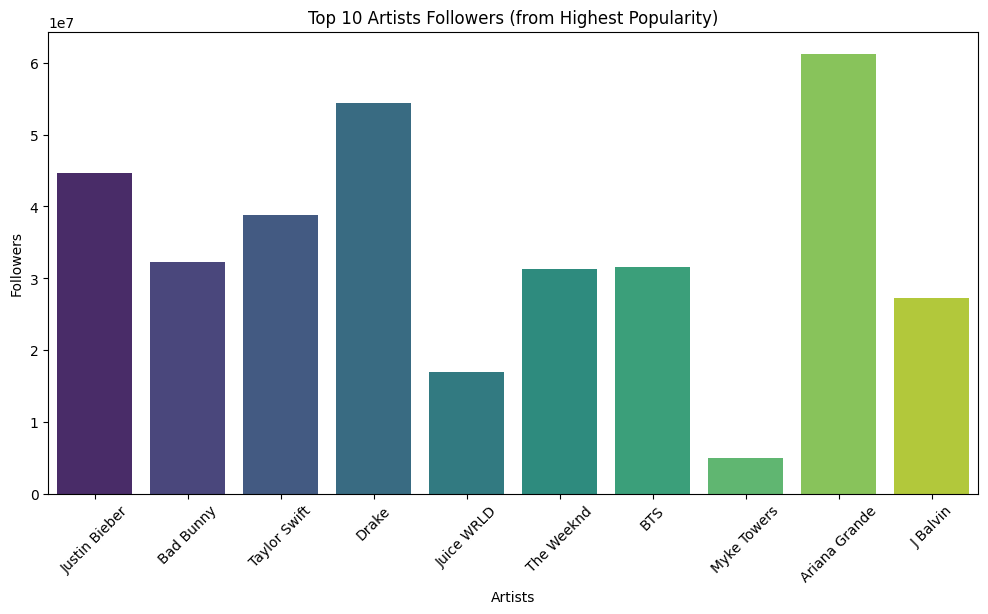

In [15]:
# popularity and followers of top10 artists

# bar plot of top 10 artists by followers
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='followers', data=top10_artists, palette='viridis')
plt.title('Top 10 Artists Followers (from Highest Popularity)')
plt.xlabel('Artists')
plt.ylabel('Followers')
plt.xticks(rotation=45)
plt.show()


Mean popularity of artists: 9.083883808469967
Median popularity of artists: 2.0
Standard deviation of artist popularity: 13.763095645228239


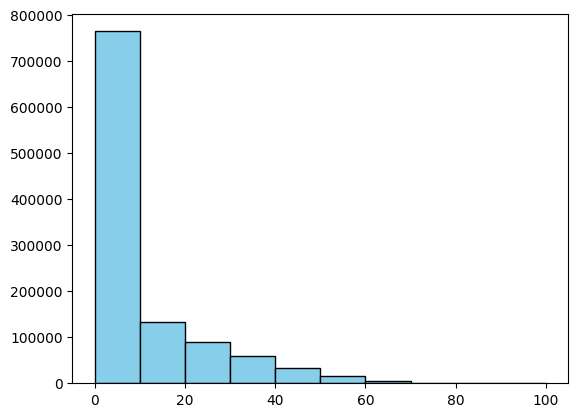

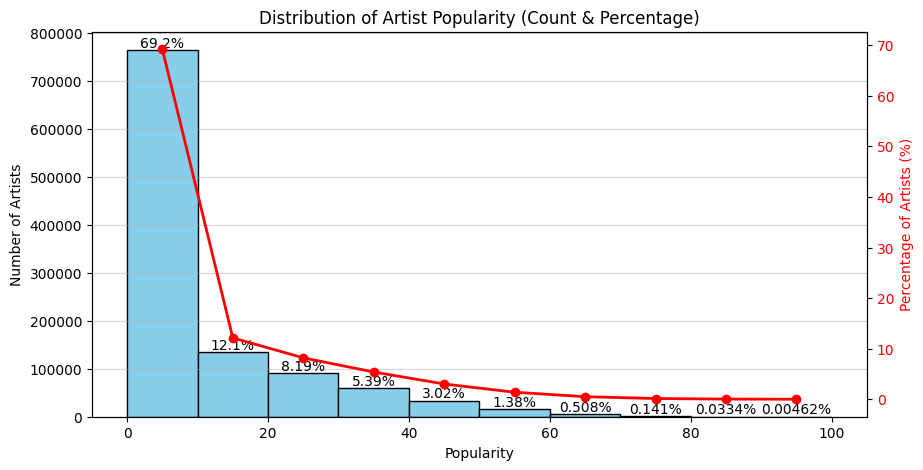

In [16]:
# artist popularity
mean_popularity = artist_df['popularity'].mean()
print(f"\nMean popularity of artists: {mean_popularity}")

median_popularity = artist_df['popularity'].median()
print(f"Median popularity of artists: {median_popularity}")

std_popularity = artist_df['popularity'].std()
print(f"Standard deviation of artist popularity: {std_popularity}")


# Create the histogram and get counts
counts, bins, patches = plt.hist(
    artist_df['popularity'], 
    bins=10, 
    edgecolor='black', 
    color='skyblue'
)

# Convert counts to percentages
percentages = (counts / counts.sum()) * 100

# Create a twin axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Primary axis (left): counts
bars = ax1.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='skyblue', edgecolor='black')
ax1.set_ylabel('Number of Artists')
ax1.set_xlabel('Popularity')
ax1.set_title('Distribution of Artist Popularity (Count & Percentage)')
ax1.grid(axis='y', alpha=0.5)

# Add data labels
for bar, perc in zip(bars, percentages):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2,  # x position
        height,                             # y position (top of the bar)
        f'{perc:.3g}%',                     # label perc to 3sf
        ha='center', va='bottom', fontsize=10
    )

# Secondary axis (right): percentage
ax2 = ax1.twinx()
ax2.plot(bins[:-1] + np.diff(bins)/2, percentages, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Percentage of Artists (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')


From the above distribution, we can understand that amongst the number of artists in the dataset, approximately 80% of the artists in spotify have a popularity score of 20 and below. This suggests that majority of the artists who has tracks on spotify are not known very widely and only a small handful of artists have a popularity score of more than 20. Additionally, this also shows that the dataset is greatly skewed to the left, with majority of the data having low popularity scores.

    release_decade  counts
0             1900       1
1             1920    3058
2             1930    5875
3             1940    9302
4             1950   20130
5             1960   30429
6             1970   41626
7             1980   58603
8             1990   83652
9             2000   73979
10            2010  101208
11            2020   20218


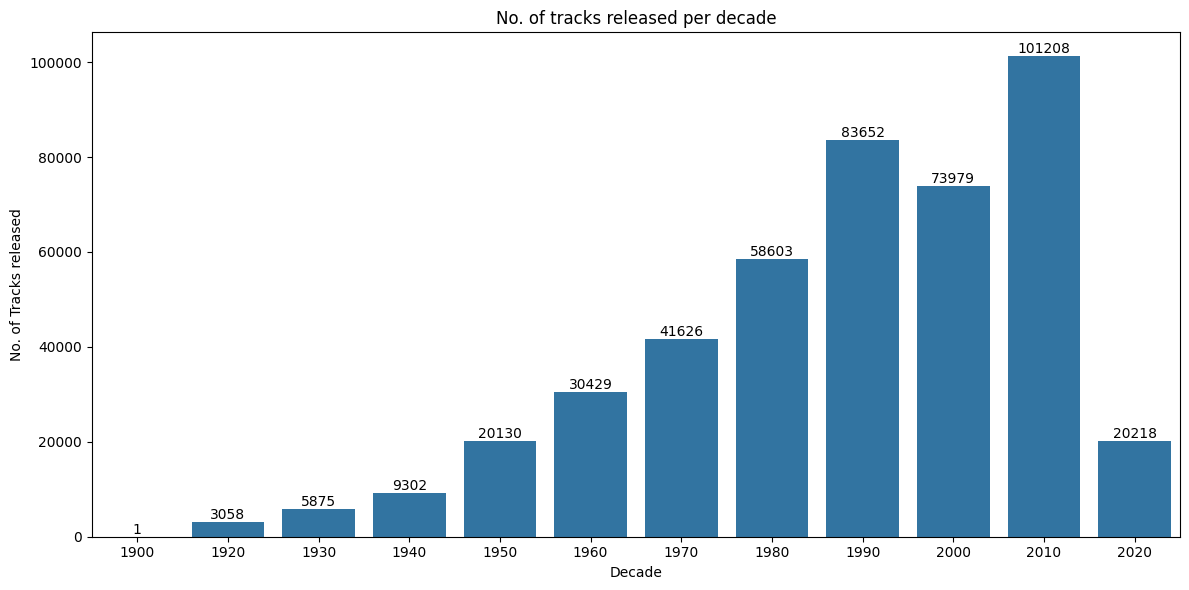

In [ ]:
# no. of tracks released per decade
unique_tracks = combined_df[['id_track', 'name_track','release_date']].drop_duplicates(['id_track']) #since the tracks and artists dataset was exploded earlier
                                                                                                     # there contains duplicates of tracks
unique_tracks['release_date'] = pd.to_datetime(unique_tracks['release_date'], errors='coerce')

unique_tracks['release_yr'] = unique_tracks['release_date'].dt.year
unique_tracks['release_decade'] = (unique_tracks['release_yr']//10) * 10

tracks_per_decade = unique_tracks.groupby('release_decade').size().reset_index(name='counts')
tracks_per_decade['release_decade'] = tracks_per_decade['release_decade'].astype(int)
print(tracks_per_decade)

fig, ax = plt.subplots(figsize=(12,6))
bar_dec = sns.barplot(data=tracks_per_decade, x='release_decade', y='counts', ax=ax)

ax.set_title("No. of tracks released per decade")
ax.set_xlabel("Decade")
ax.set_ylabel("No. of Tracks released")

# Add data labels
for bar in bar_dec.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',  # or use str(height) if it's not an integer
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()


C:\Users\Jasmine\AppData\Local\Temp\ipykernel_18904\1945362606.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres = genres_per_decade.groupby('release_decade').apply(lambda x: x.nlargest(5, 'avg_popularity_d')).reset_index(drop=True)


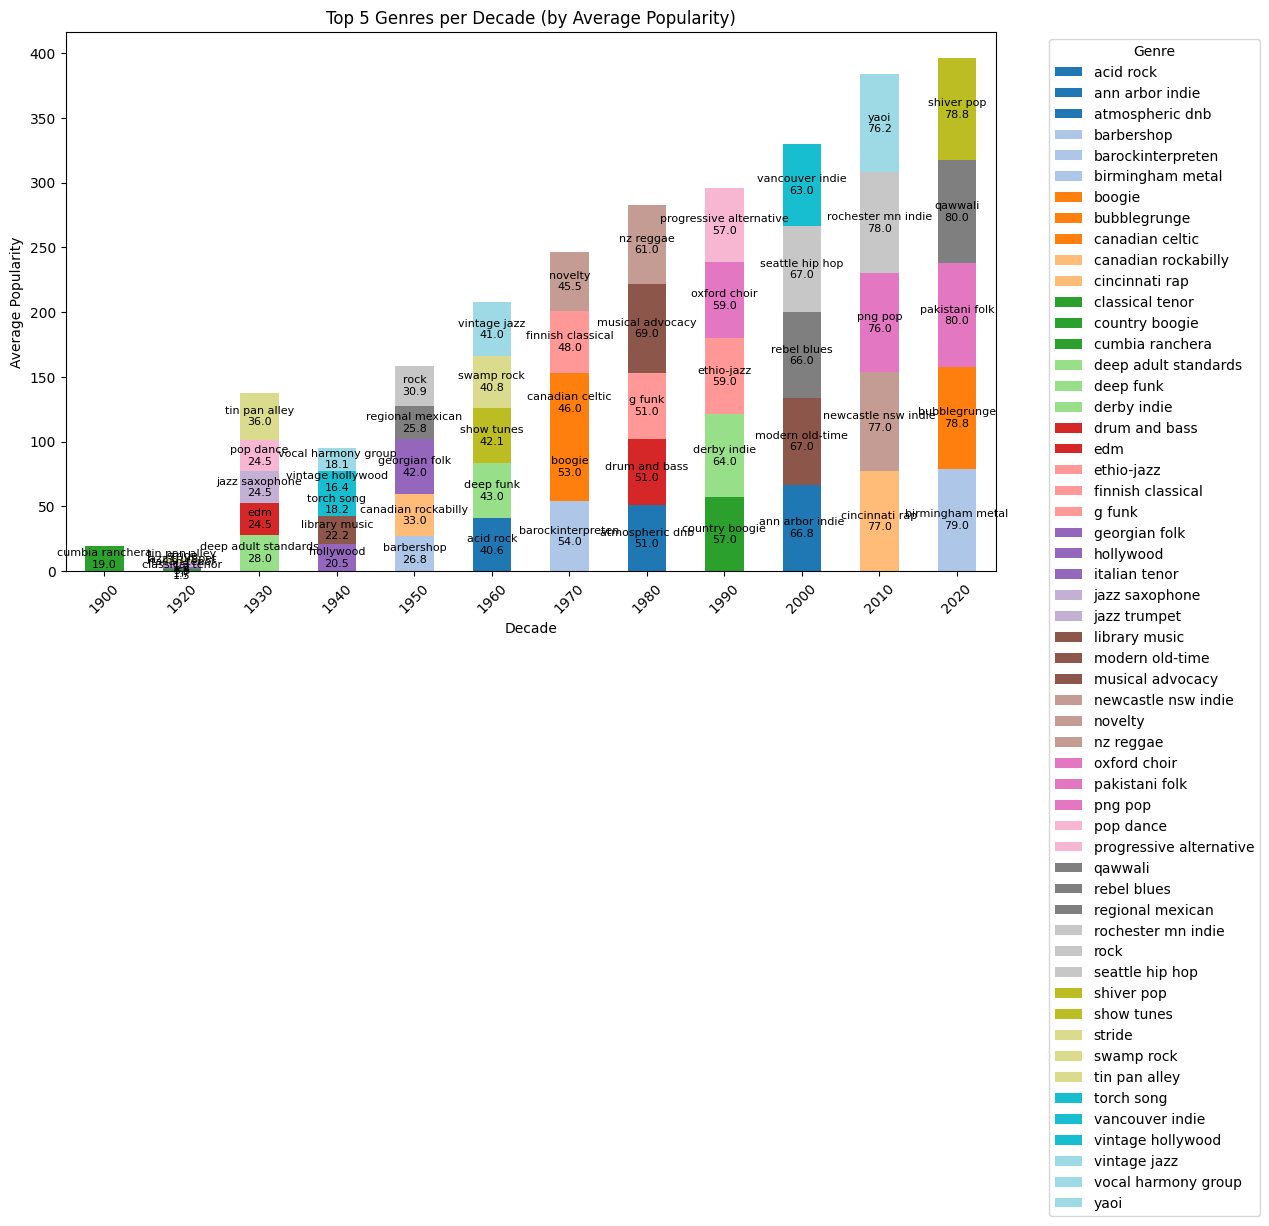

In [ ]:
# top genres per decade
genres_per_decade = combined_df.groupby(['release_decade','genres'])['popularity_track'].mean().reset_index(name='avg_popularity_d')
top_genres = genres_per_decade.groupby('release_decade').apply(lambda x: x.nlargest(5, 'avg_popularity_d')).reset_index(drop=True)
top_genres['release_decade'] = top_genres['release_decade'].astype(int)

# Pivot for stacked bar chart
pivot_df = top_genres.pivot(index='release_decade', columns='genres', values='avg_popularity_d').fillna(0)

# Plot stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.ylabel('Average Popularity')
plt.xlabel('Decade')
plt.title('Top 5 Genres per Decade (by Average Popularity)')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels to each section
for i, decade in enumerate(pivot_df.index):
    y_offset = 0
    for genre in pivot_df.columns:
        value = pivot_df.loc[decade, genre]
        if value > 0:
            ax.text(
                i, y_offset + value / 2, f'{genre}\n{value:.1f}',
                ha='center', va='center', fontsize=8, color='black', rotation=0
            )
            y_offset += value

plt.show()

Index(['id_track', 'name_track', 'popularity_track', 'duration_ms', 'explicit',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'id_artist', 'name_artist',
       'genres', 'popularity_artist'],
      dtype='object')


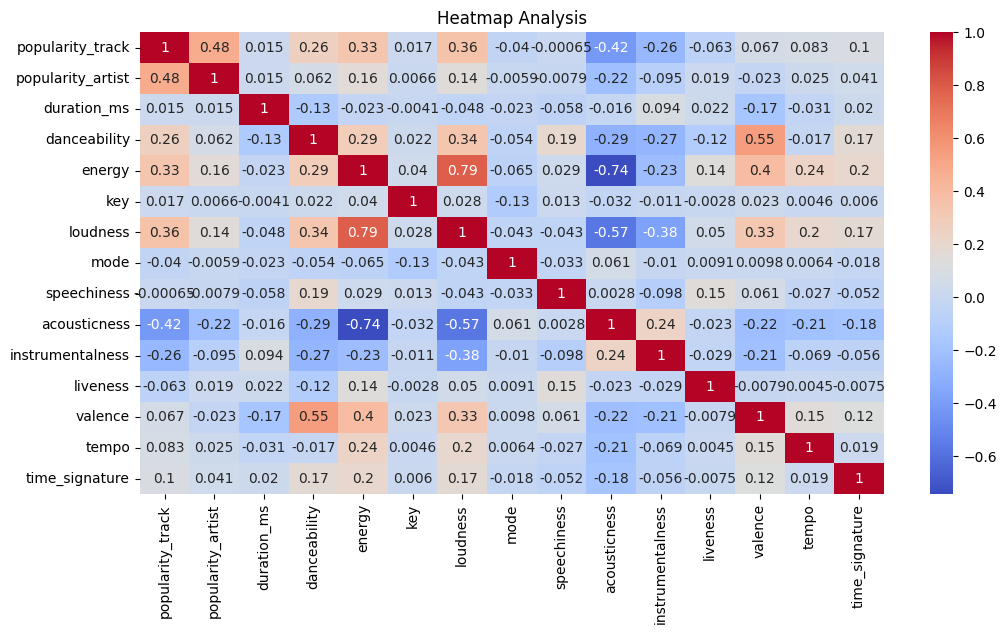

In [ ]:
# correlation between variables and track popularity
print(combined_df.columns)
heatmap_analysis = combined_df[['popularity_track', 'popularity_artist','duration_ms','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'time_signature']]

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_analysis.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Analysis")
plt.show()

0.7647349852469285


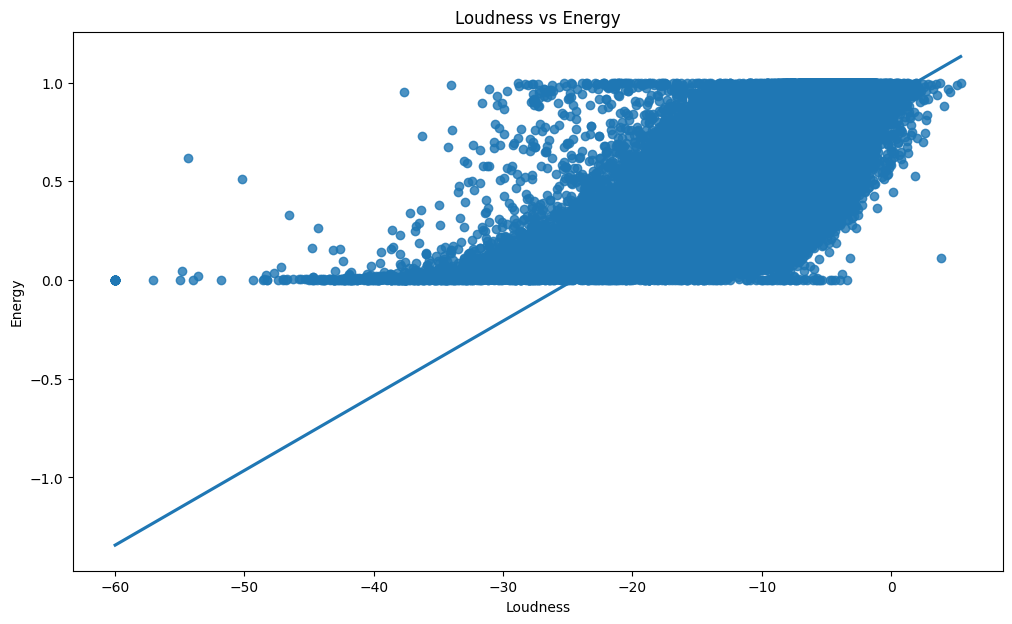

In [36]:
# scatter plot of loudness and energy

unique_tracks_le = combined_df[['id_track', 'name_track', 'loudness', 'energy']].drop_duplicates(['id_track','name_track'])
le_pearsonCorr, le_pearsonP = pearsonr(unique_tracks_le['loudness'], unique_tracks_le['energy'])
print(le_pearsonCorr)

plt.figure(figsize=(12,7))
sns.regplot(data=unique_tracks_le, x='loudness', y='energy')
plt.title("Loudness vs Energy")
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.show()

From heatmap map, the pearson's correlation's test as well as the regression plot, we can see a strong correlation between a track's loudness as well as it's energy level. This suggest that the louder the track gets, the higher the energy the track would exude.